# Atividade 03
Nomes: Douglas e Ezequiel

Nesta atividade vocês precisarão implementar o modelo gaussiano no Python. Vocês devem realizar os seguintes tópicos:

- Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.

- Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.

- Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs (quem fizer o método de Briggs ganha um ponto a mais). Deve ser considerado o efeito Tip-Downwash

- Implementar a função do modelo gaussiano

- Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

- Faça figuras e discuta os resultados.

# Etapa 01
Fonte dos dados das classes de Pasquill: NOAA (National Oceanic and Atmospheric Administration)
disponível em: https://www.ready.noaa.gov/READYpgclass.php
Para o nível de radiação, adotar os valores de fluxo de calor sensível:
Forte: > 800 W/m²
Moderada: Entre 500 e 800 W/m²
Fraca: < 500 W/m²
Obs: Noite refere-se ao período de 1 hora antes do pôr do sol até 1 hora após o nascer do sol, ou seja, entre 19hs / 07hs

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def classify_pasquill_stability(wind_speed, solar_radiation, cloud_cover, is_daytime):
    if is_daytime:
        if solar_radiation == 'alta':
            if wind_speed < 2:
                return 'A'
            elif wind_speed < 3:
                return 'B'
            elif wind_speed < 5:
                return 'C'
            elif wind_speed < 6:
                return 'D'
            else:
                return 'D'
        elif solar_radiation == 'média':
            if wind_speed < 2:
                return 'B'
            elif wind_speed < 3:
                return 'B'
            elif wind_speed < 5:
                return 'C'
            elif wind_speed < 6:
                return 'D'
            else:
                return 'D'
        elif solar_radiation == 'baixa':
            if wind_speed < 2:
                return 'C'
            elif wind_speed < 3:
                return 'C'
            elif wind_speed < 5:
                return 'D'
            elif wind_speed < 6:
                return 'D'
            else:
                return 'D'
    else:
        if cloud_cover == 'baixa':
            if wind_speed < 2:
                return 'F'
            elif wind_speed < 3:
                return 'E'
            elif wind_speed < 5:
                return 'D'
            else:
                return 'D'
        elif cloud_cover == 'média':
            if wind_speed < 2:
                return 'E'
            elif wind_speed < 5:
                return 'D'
            else:
                return 'D'
        elif cloud_cover == 'alta':
            return 'D'

# 2) Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade

In [22]:
def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'B':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.20 * x * (1 + 0.0004 * x) ** 0.5
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** 0.5
        elif classe == 'E':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.08 * x * (1 + 0.0003 * x) ** 0.5
        elif classe == 'F':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.08 * x * (1 + 0.0003 * x) ** 0.5
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.08 * x
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.06 * x
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.03 * x
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.016 * x
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de área errada')
    return sigmaY, sigmaZ

# 3) Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

In [23]:
def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH_Davidson_Bryant = (d * (vs / u) ** 1.4) * (1 + (Ts - Tamb) / Ts)
    return deltaH_Davidson_Bryant

def holland_tipdownwash(d, vs, u, Ts, Tamb):
    deltaH_Holland = ((vs * d) / u) * (1.5 + 2.68 * 10 ** -10 * 1013.25 * ((Ts - Tamb) / Ts) * d)
    return deltaH_Holland


# 4) Implementar a função do modelo gaussiano

In [24]:
def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y ** 2) / (2 * sigmaY ** 2))
    termo3 = np.exp((-(z - H) ** 2) / (2 * sigmaZ ** 2)) + np.exp((-(z + H) ** 2) / (2 * sigmaZ ** 2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10 ** 6
    return conc

No código a seguir iremos fazer simulações com o código criado usando as taxas de emissões do nosso empreendimento, para isso, em diferentes classes, usamos diferentes velocidades do vento e alturas de chaminé para comparar se as emissões violam os padrões definidos pela Resolução CONAMA 491. Caso este padrão seja violado, indica a altura necessária da chaminé (de 10 em 10 metros) para que o padrão seja respeitado.
E através de gráficos, para cada situação demonstramos a dispersão das concentrações dos poluentes e a elevação da pluma ao longo da distância.
Resolução CONAMA 491: https://www.in.gov.br/web/guest/materia/-/asset_publisher/Kujrw0TZC2Mb/content/id/51058895/do1-2018-11-21-resolucao-n-491-de-19-de-novembro-de-2018-51058603

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: MP10, Concentração Máxima: 74.53851205081236 µg/m³, Padrão: 50 µg/m³
Altura da Chaminé Ajustada: 130 m
Violação: Sim

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: SO2, Concentração Máxima: 708.9687078700264 µg/m³, Padrão: 125 µg/m³
Altura da Chaminé Ajustada: 290 m
Violação: Sim

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: NOx, Concentração Máxima: 664.6208517299551 µg/m³, Padrão: 200 µg/m³
Altura da Chaminé Ajustada: 210 m
Violação: Sim

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: CO, Concentração Máxima: 248.9449847555163 µg/m³, Padrão: 10000 µg/m³
Altura da Chaminé Ajustada: 100 m
Violação: Não

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 150 m
Poluente: MP10, Concentração Máxima: 37.93511045192773 µg/m³, Padrão: 50 µg/m³
Altura da Chaminé Ajustada: 150 m
Violação: Não


C:\Users\admin\AppData\Local\Temp\ipykernel_8080\158488957.py:119: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x, y, conc, levels=levels, norm=LogNorm(), cmap='viridis')


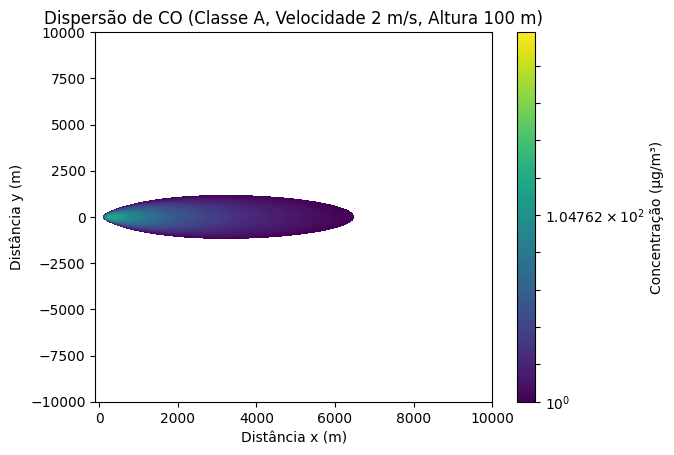

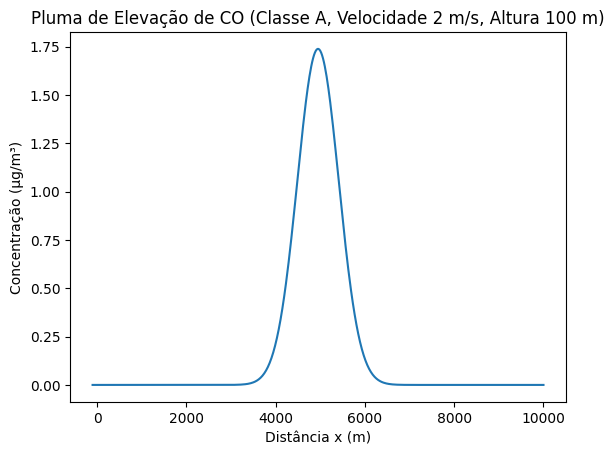

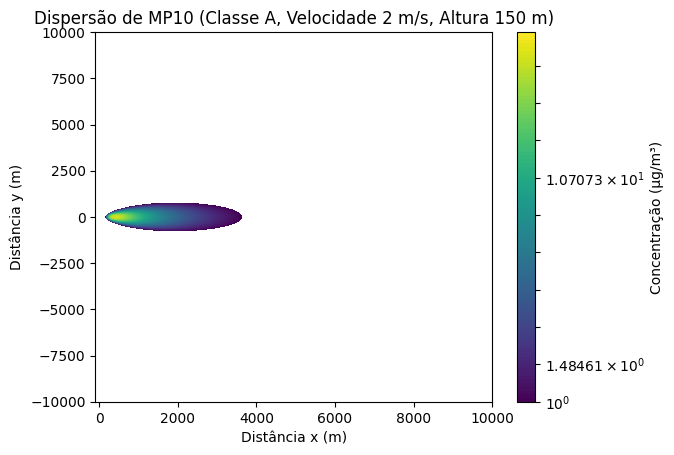

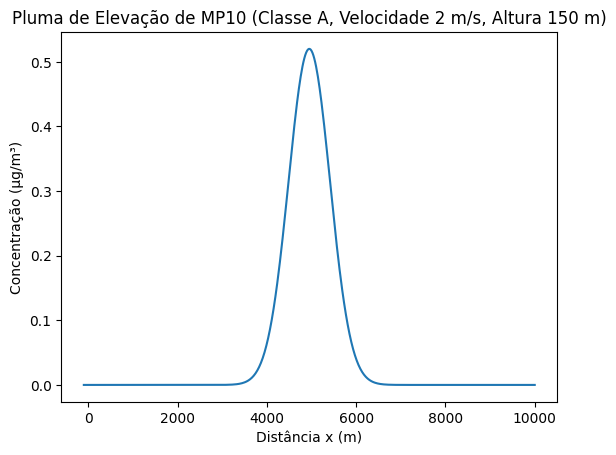

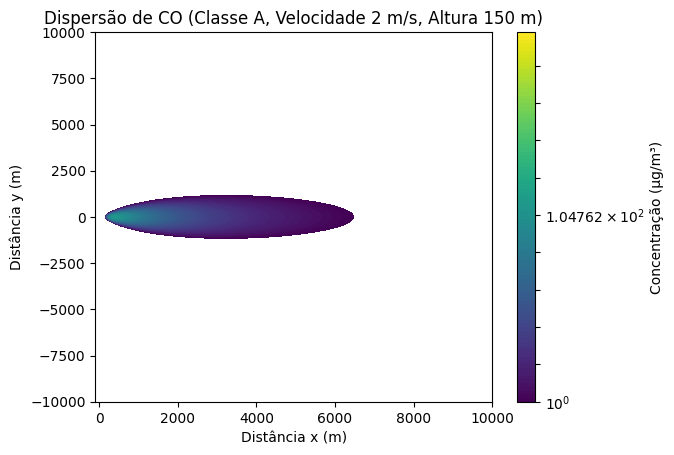

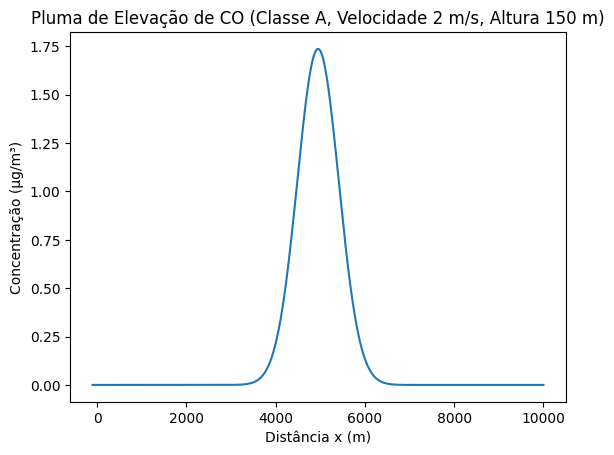

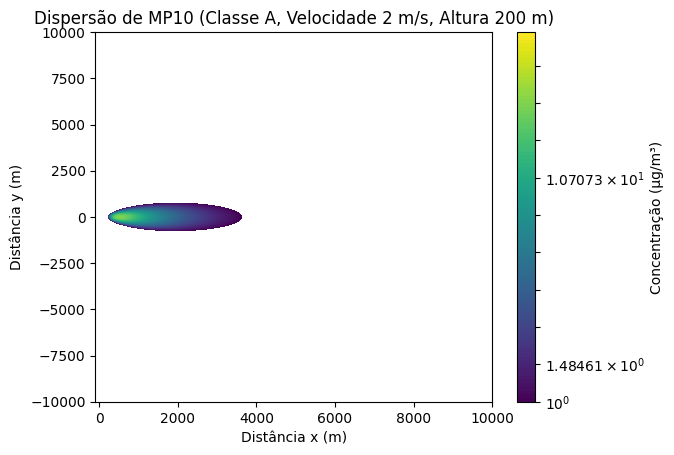

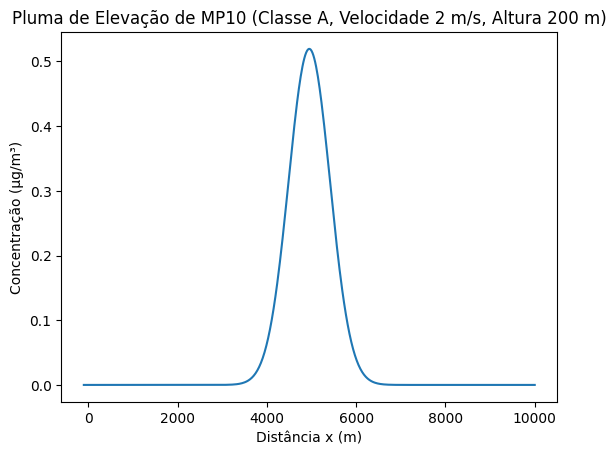

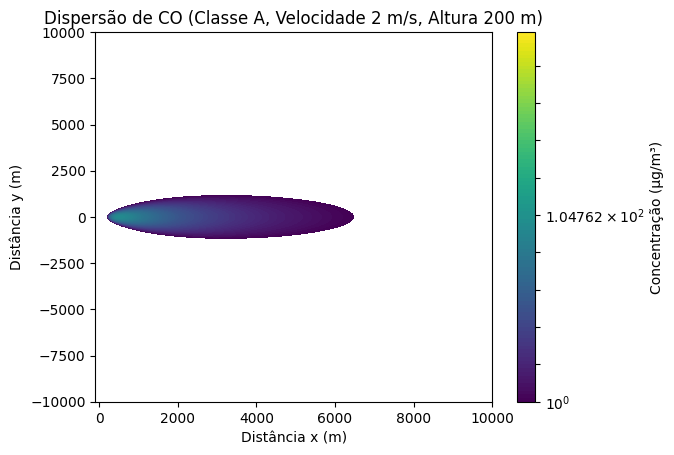

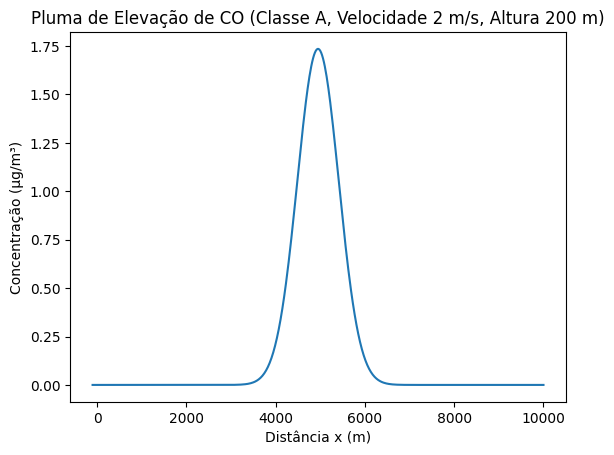

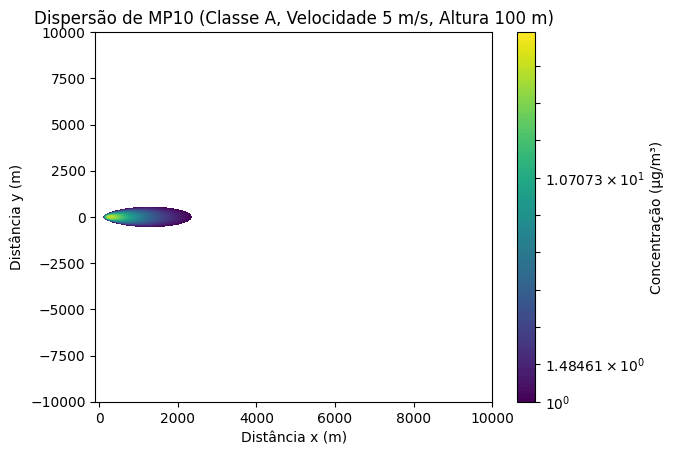

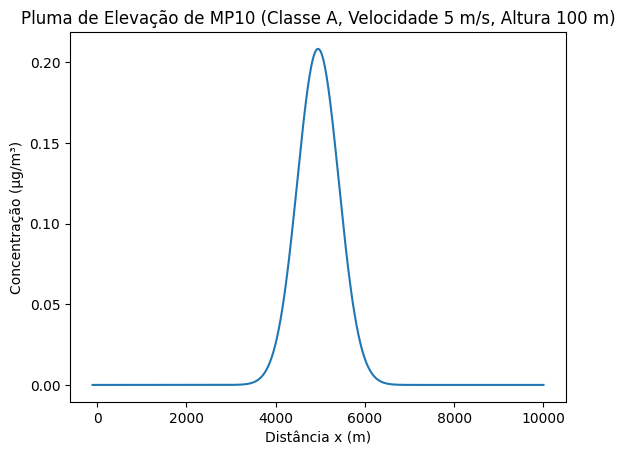

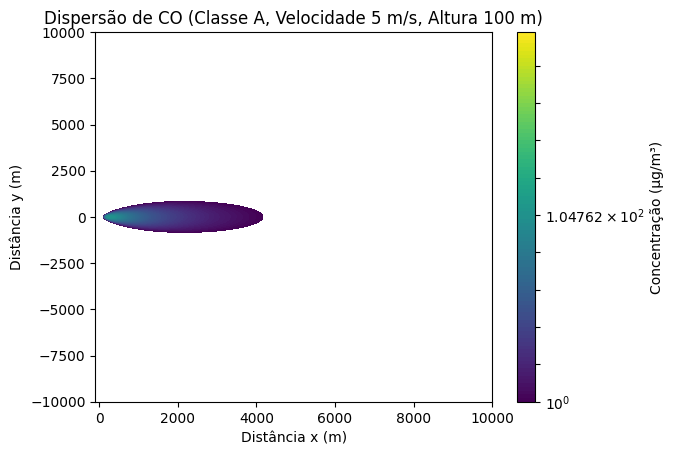

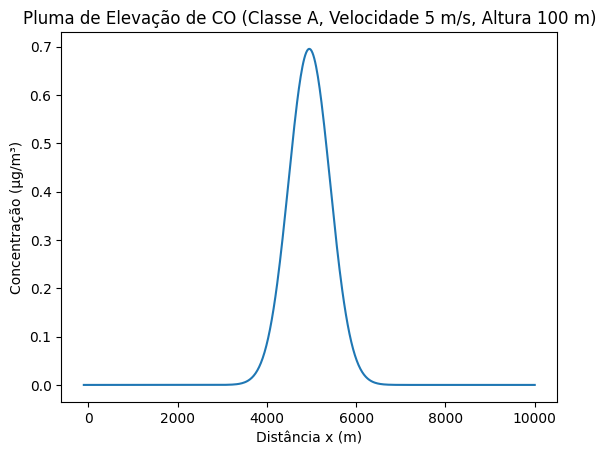

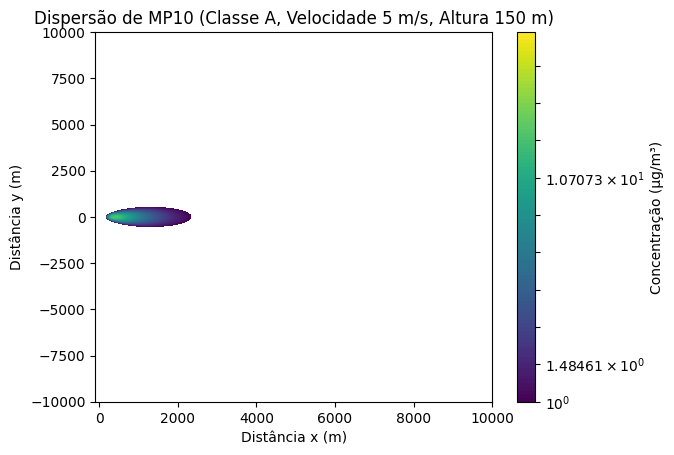

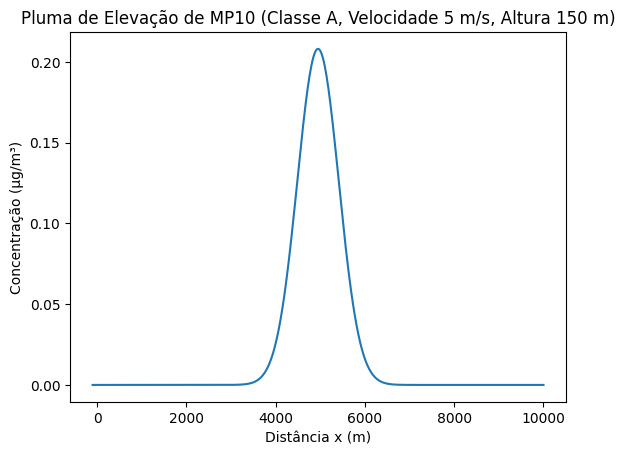

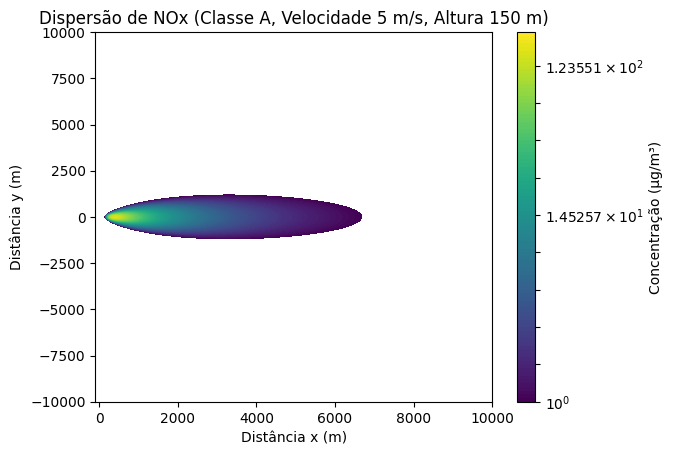

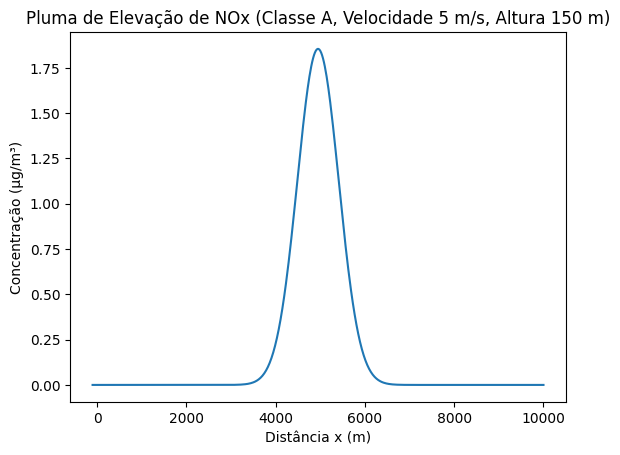

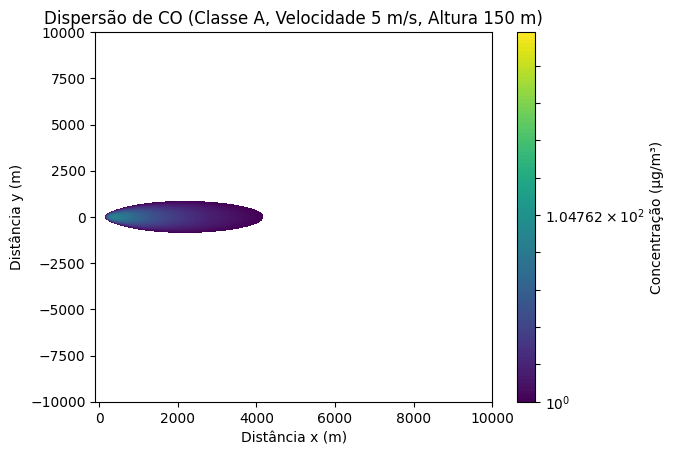

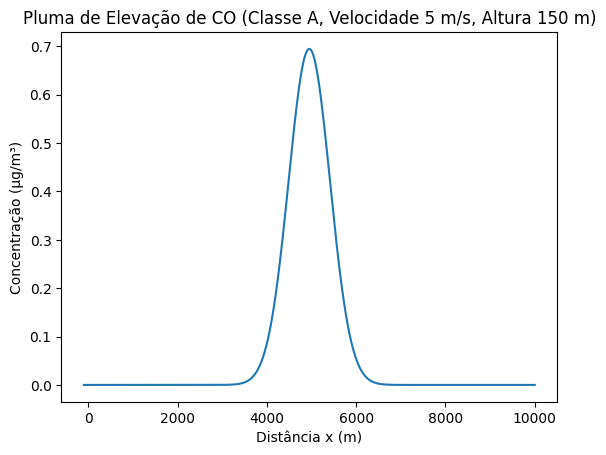

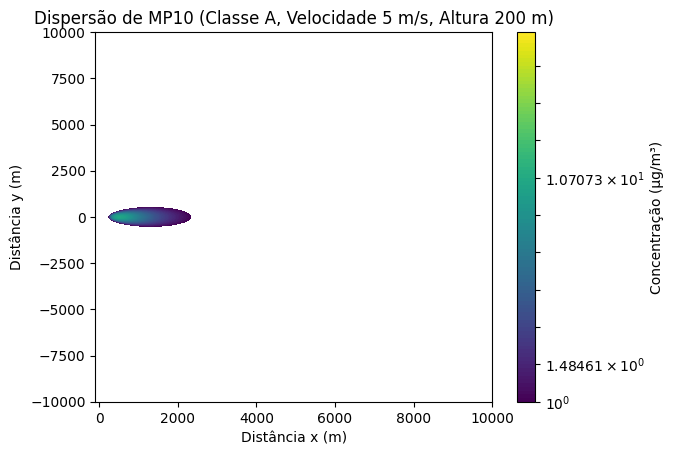

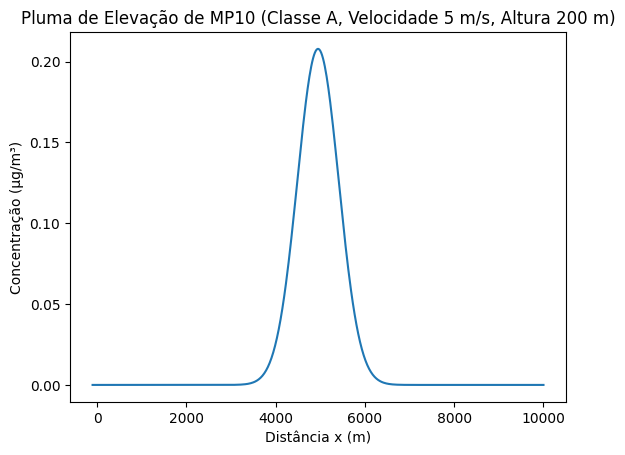

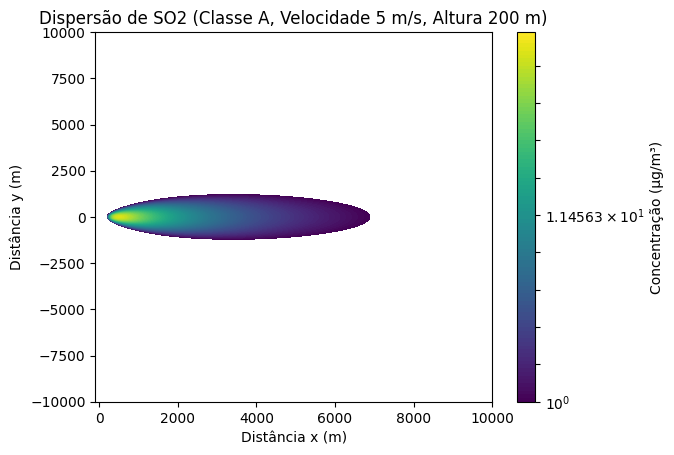

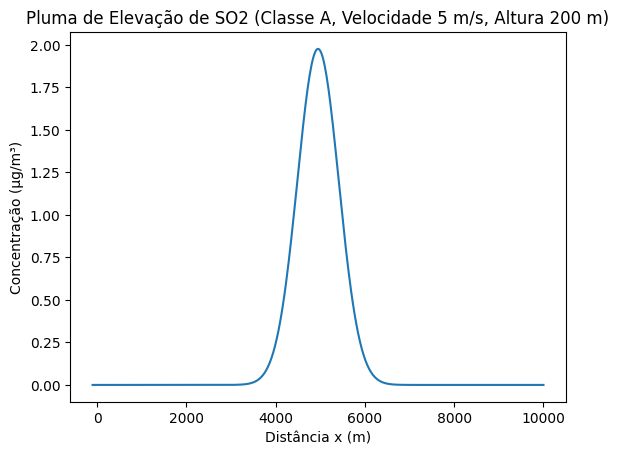

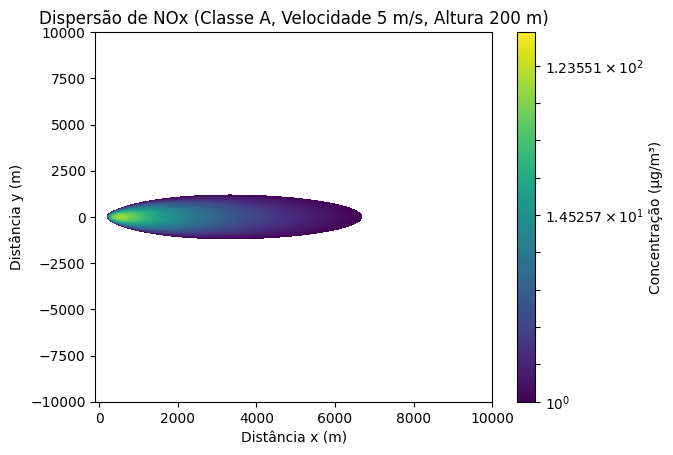

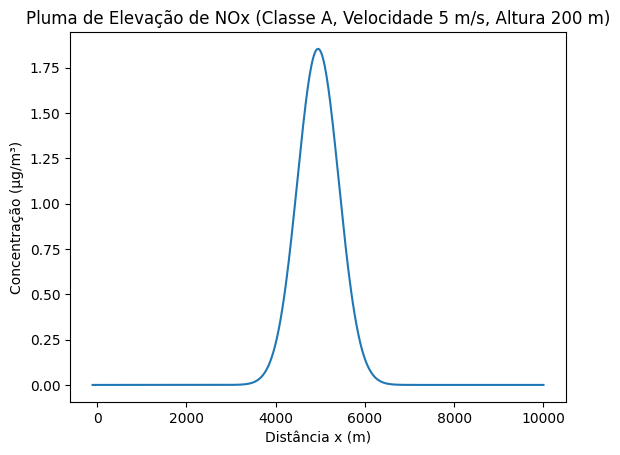

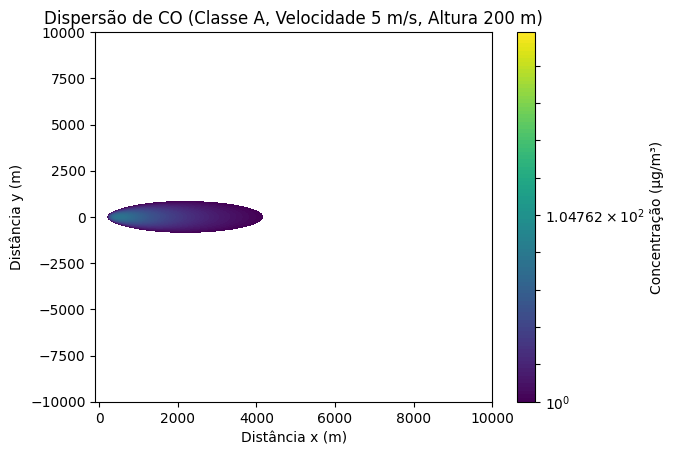

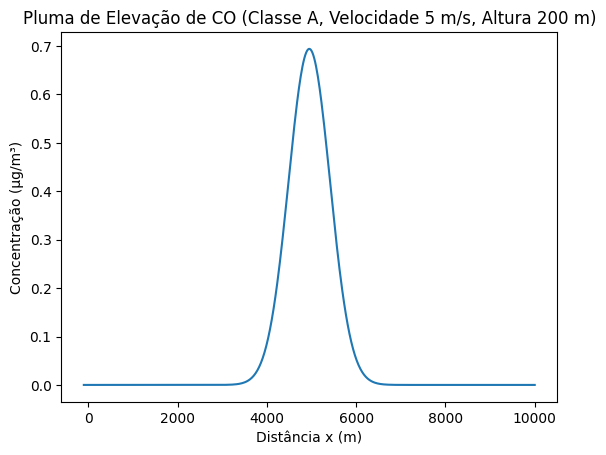

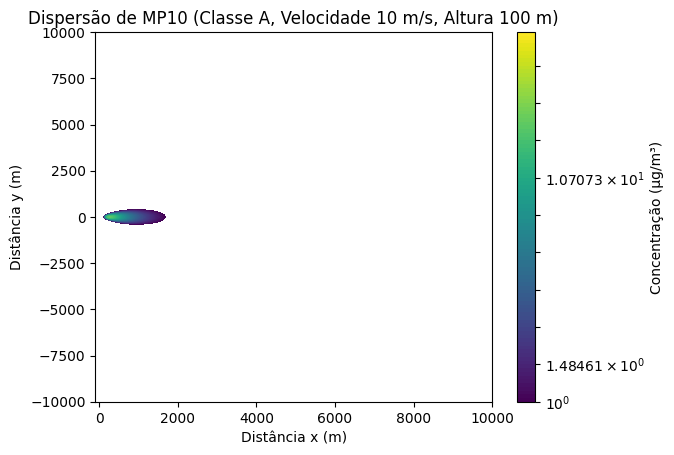

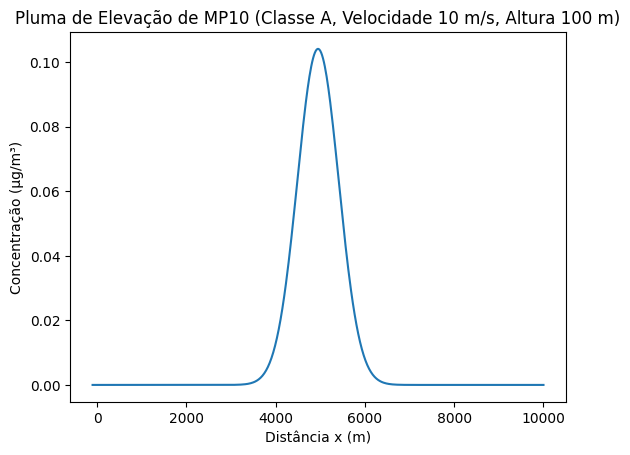

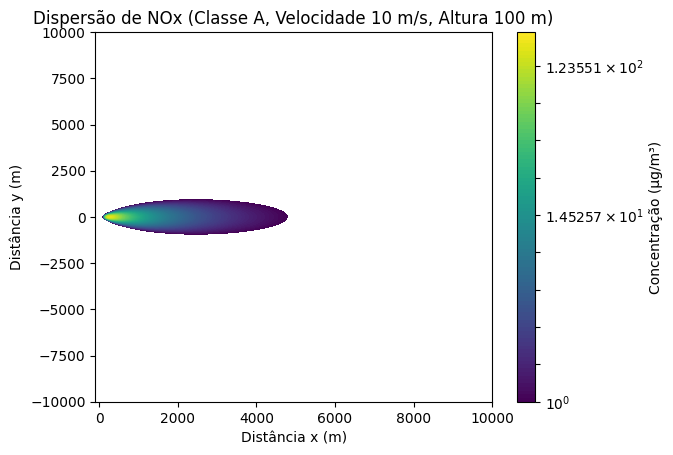

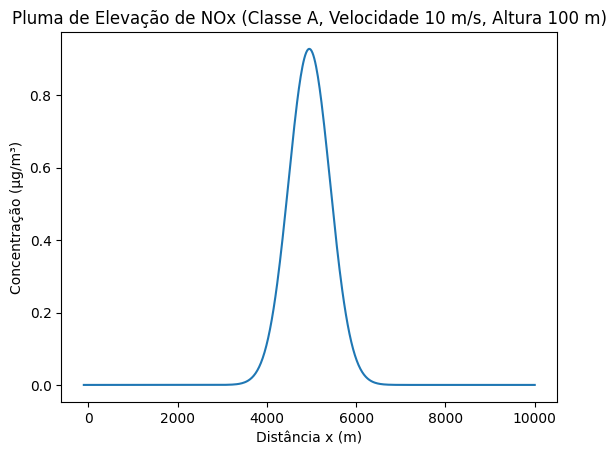

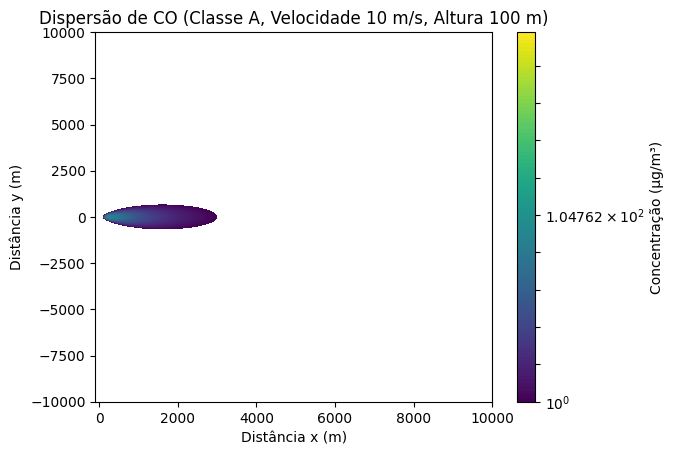

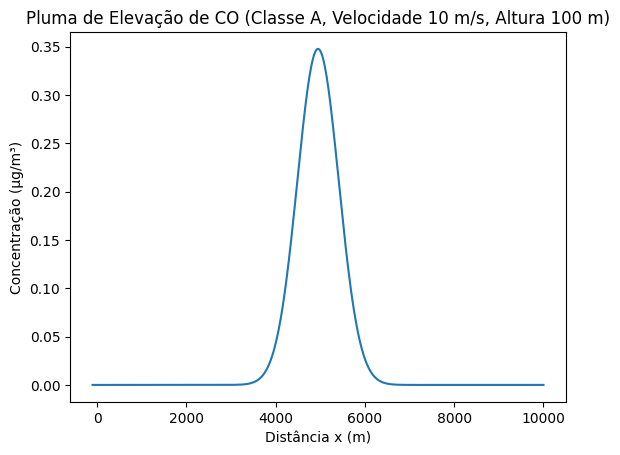

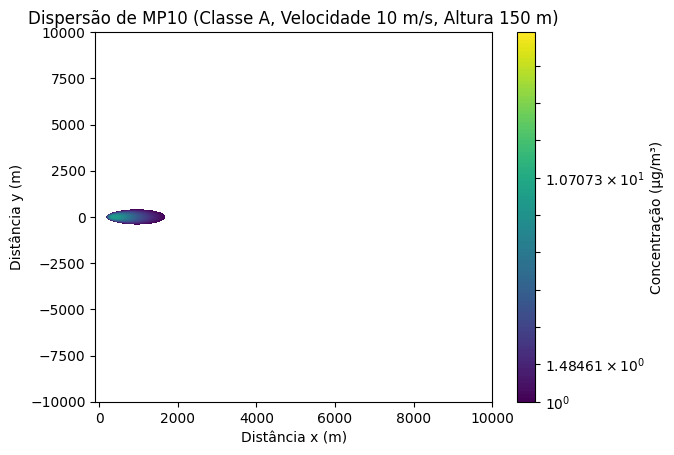

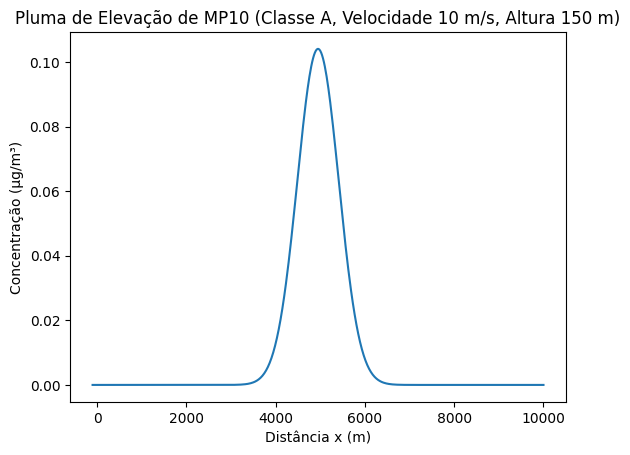

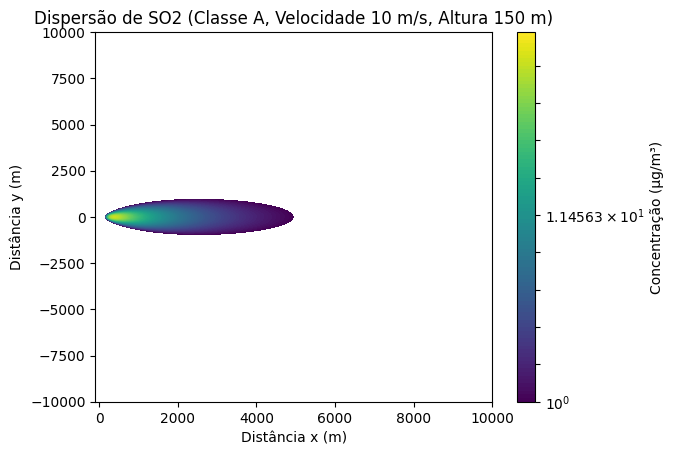

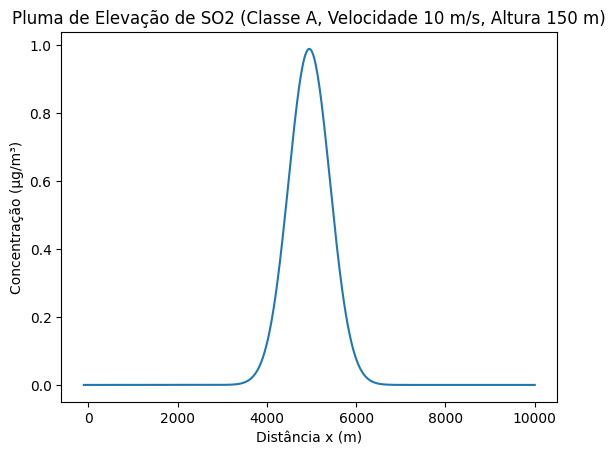

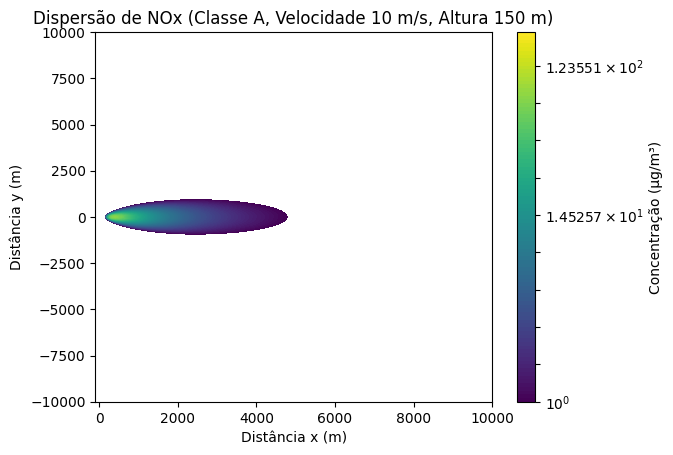

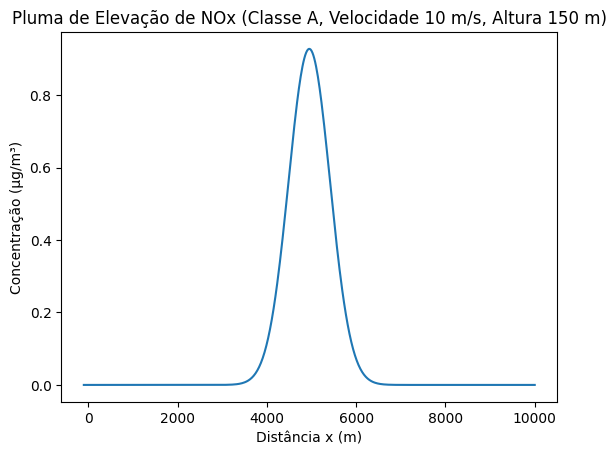

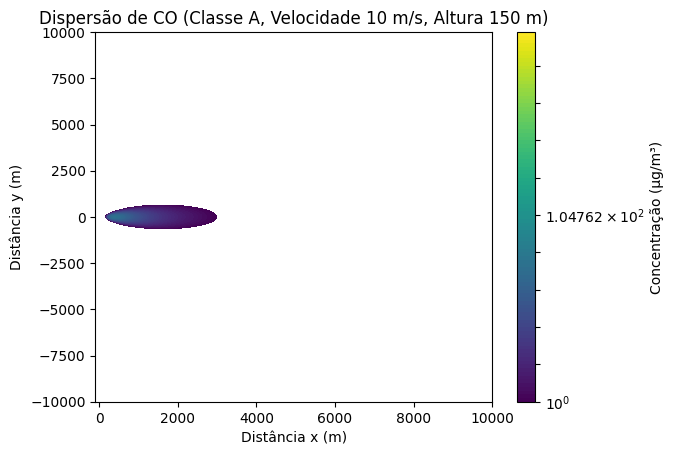

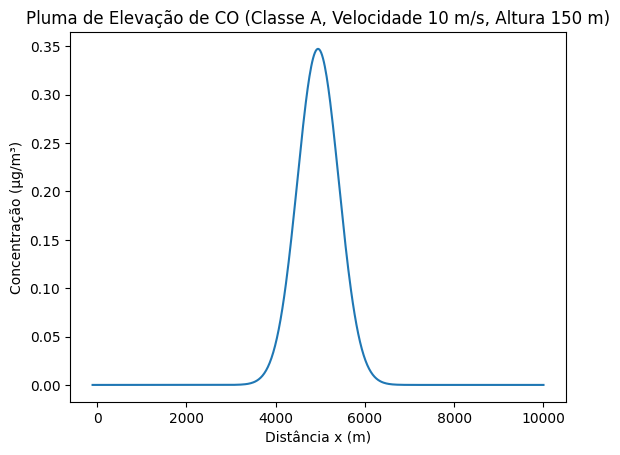

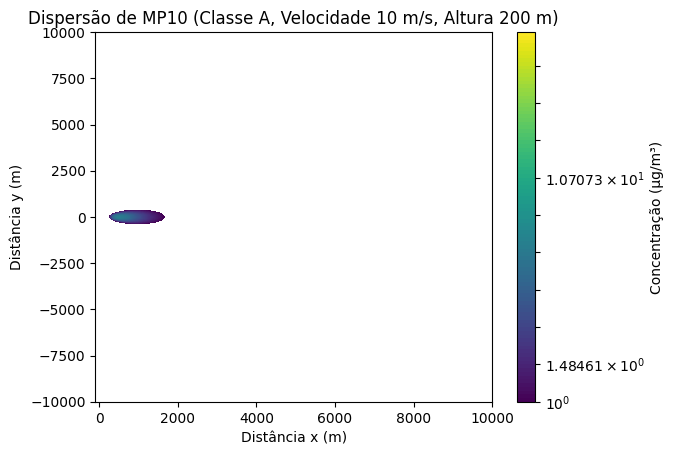

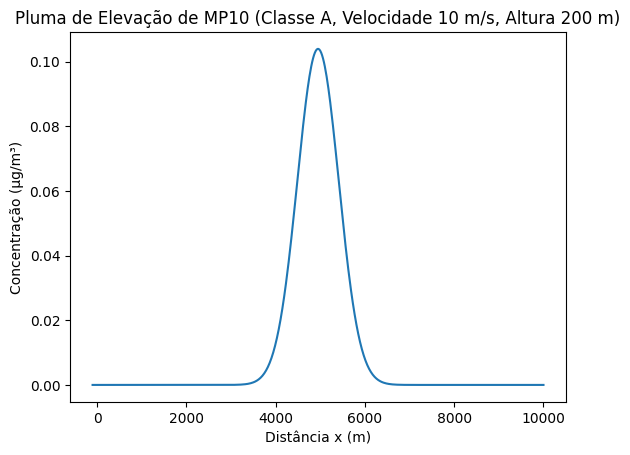

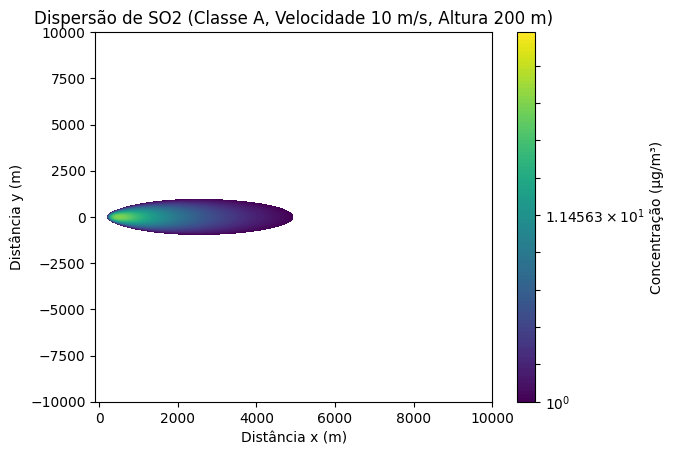

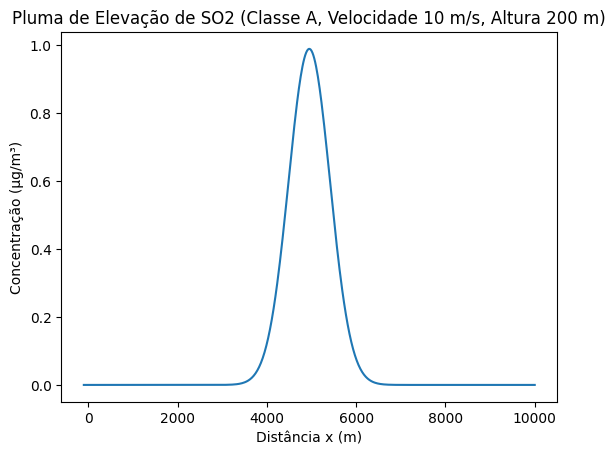

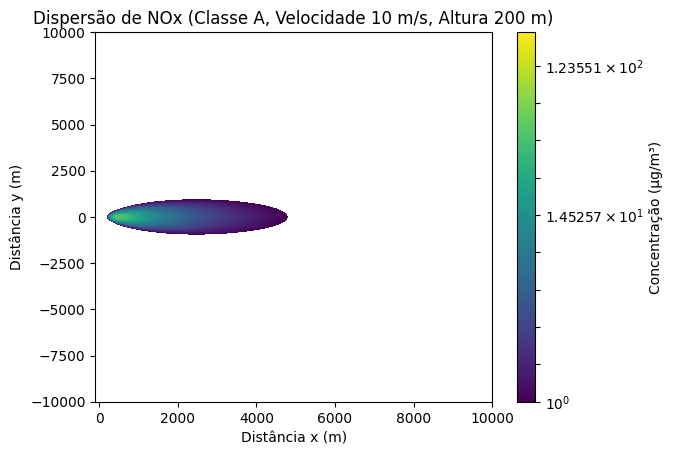

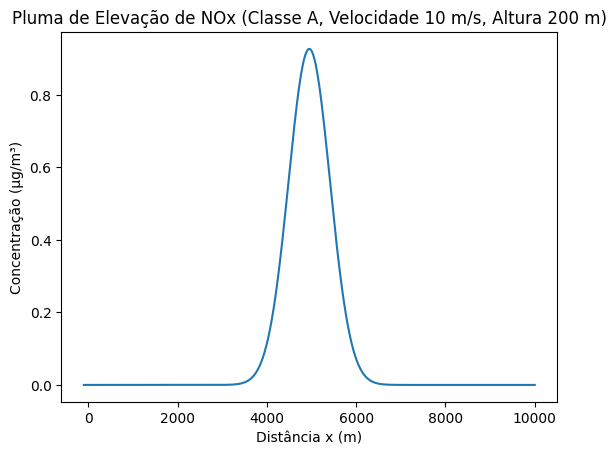

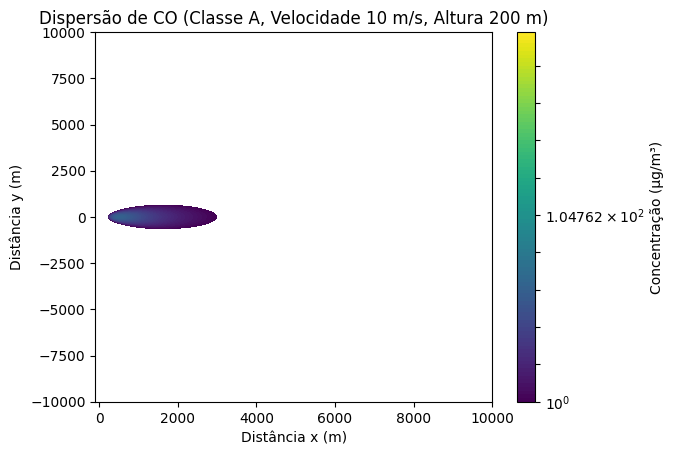

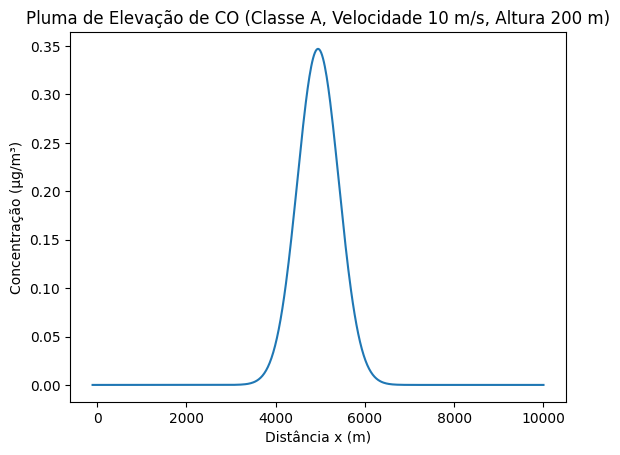

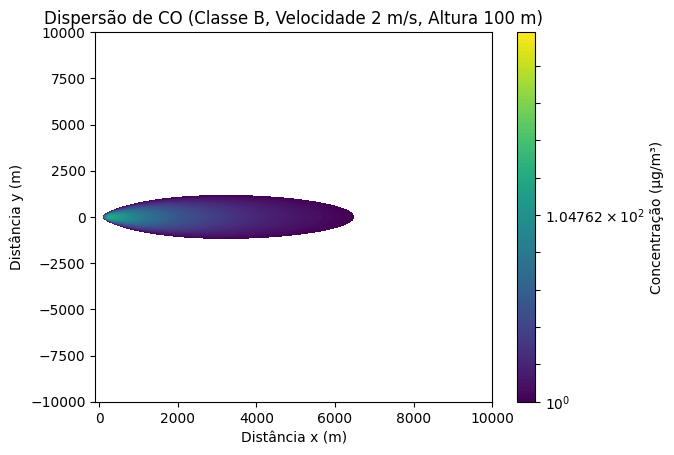

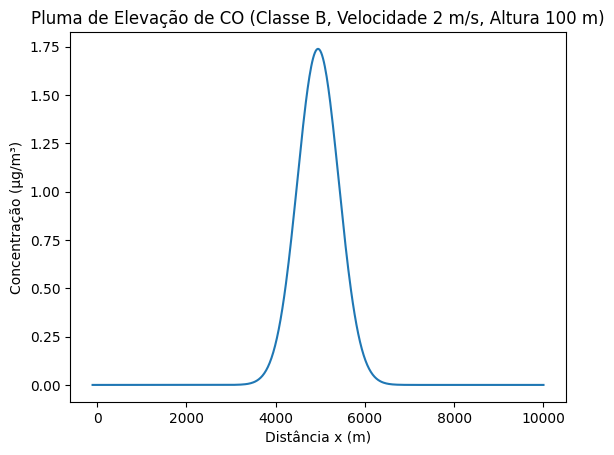

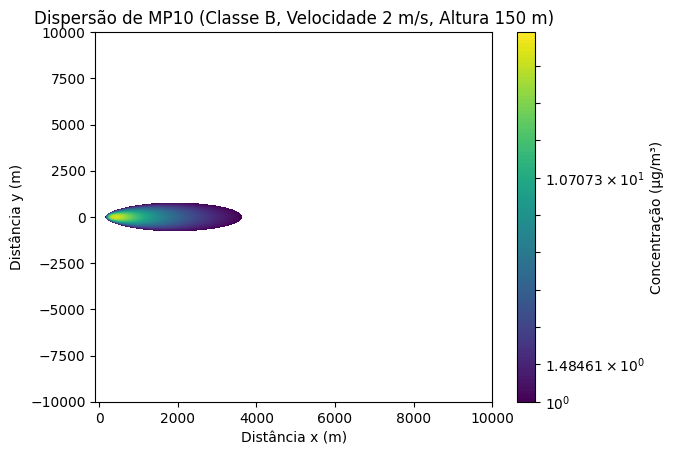

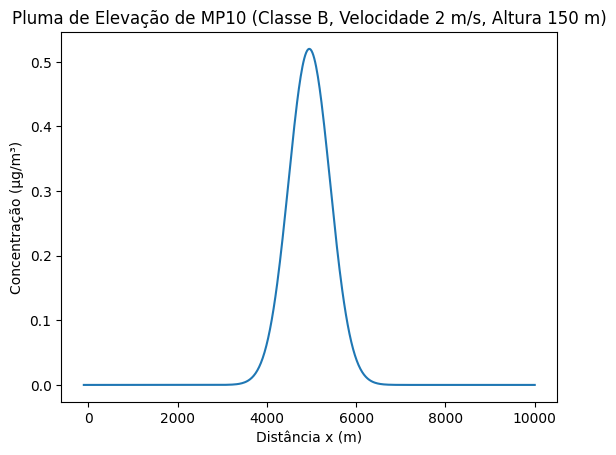

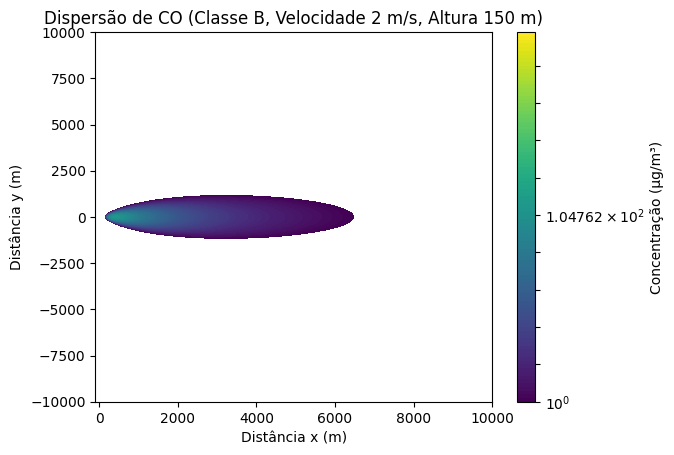

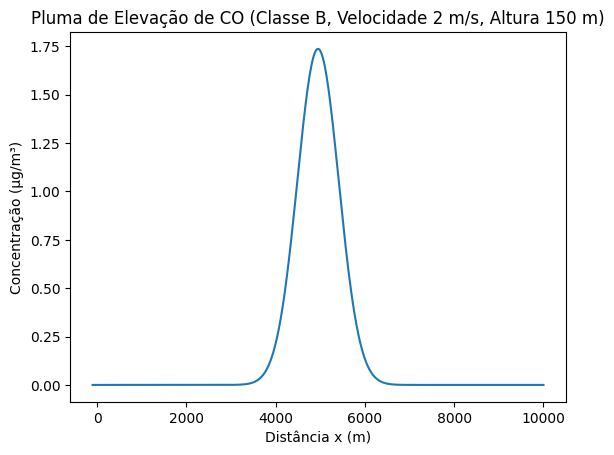

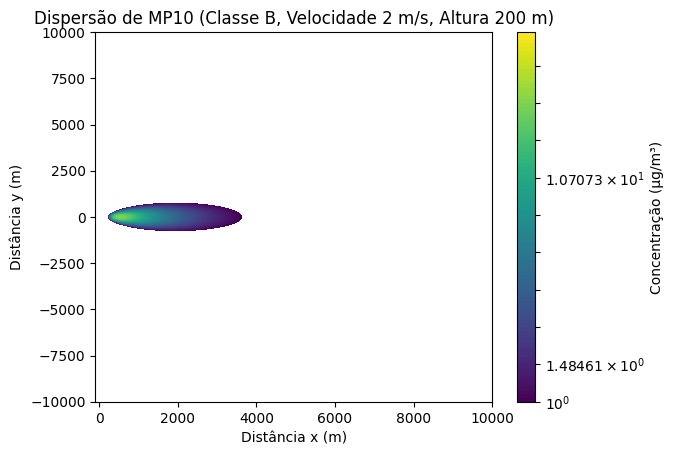

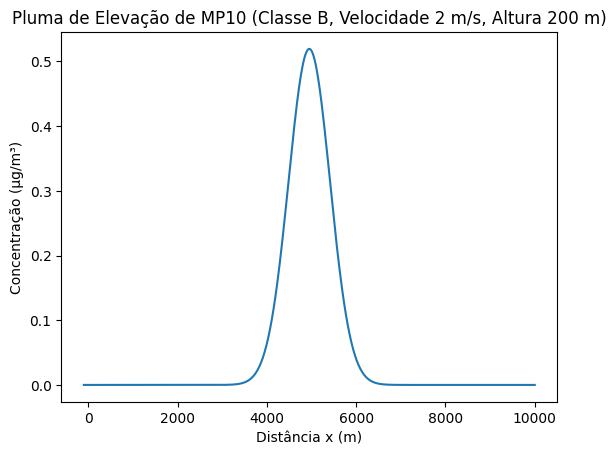

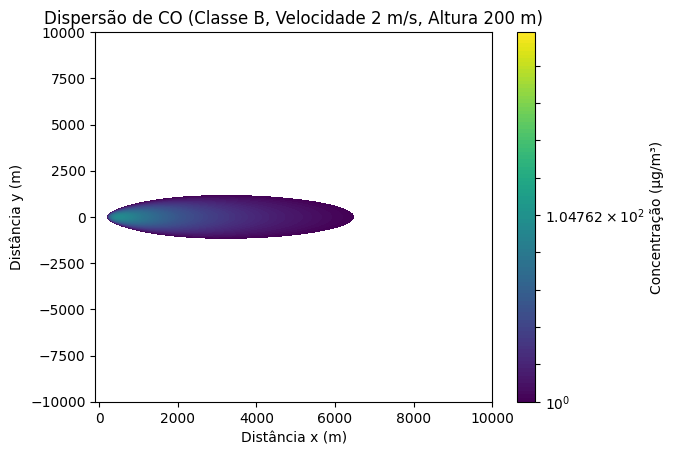

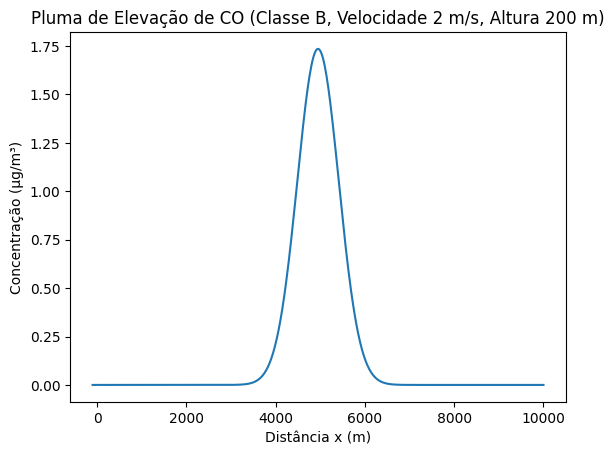

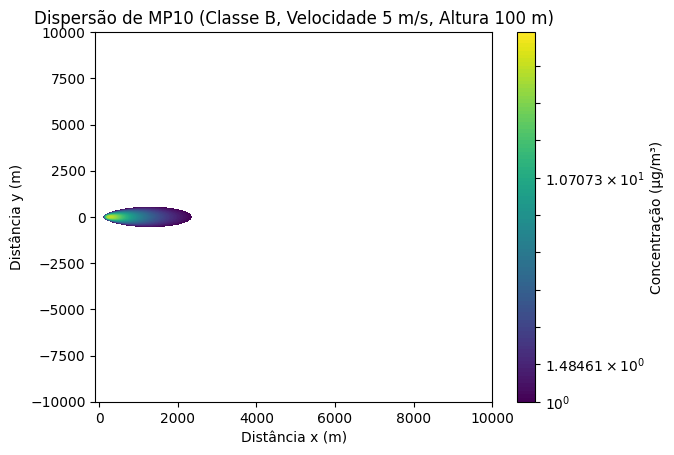

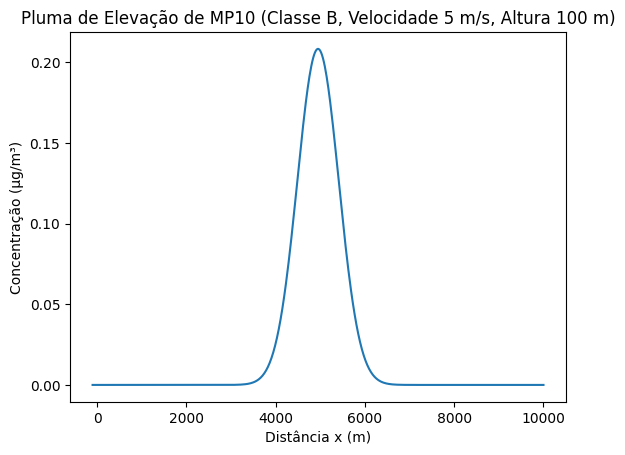

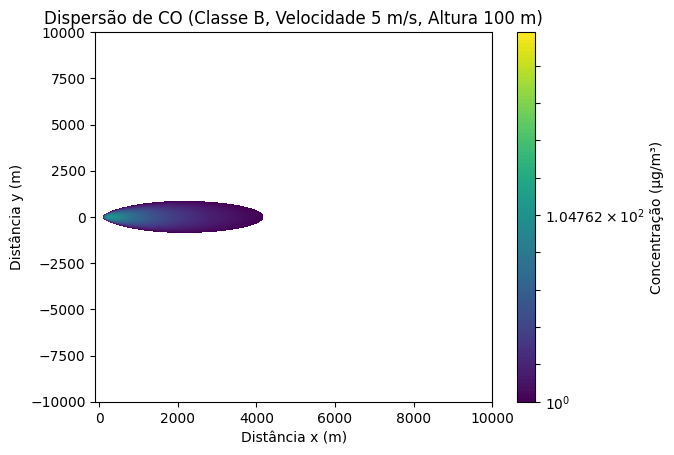

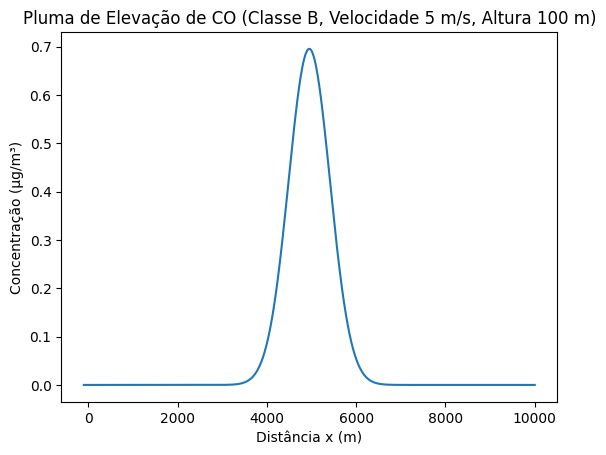

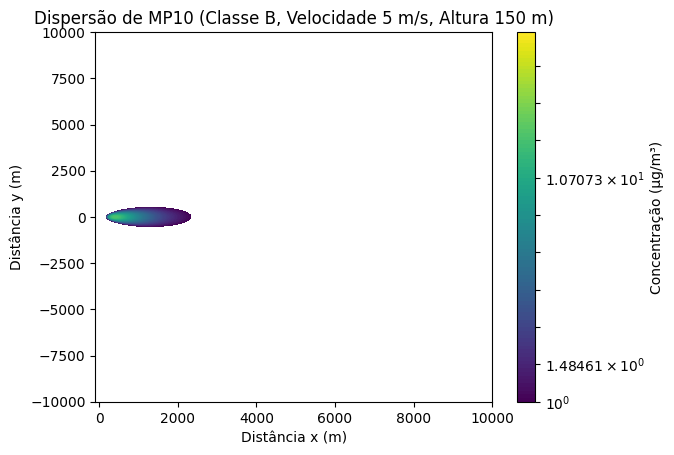

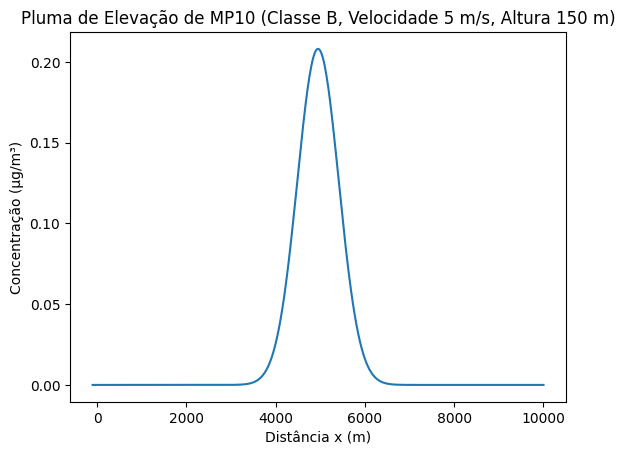

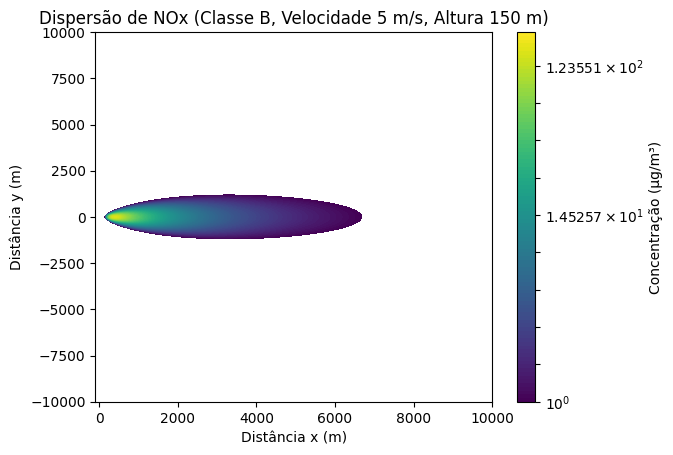

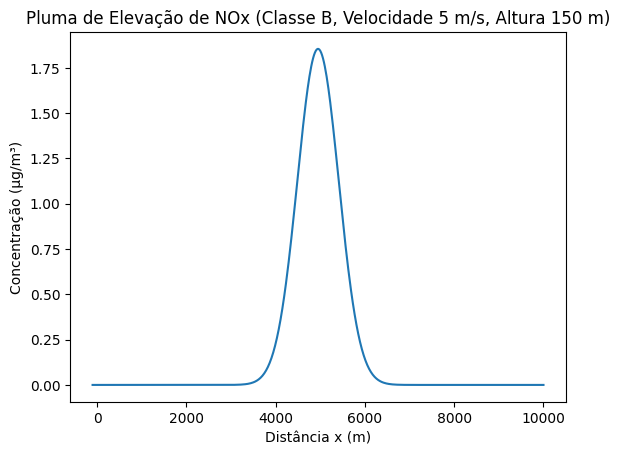

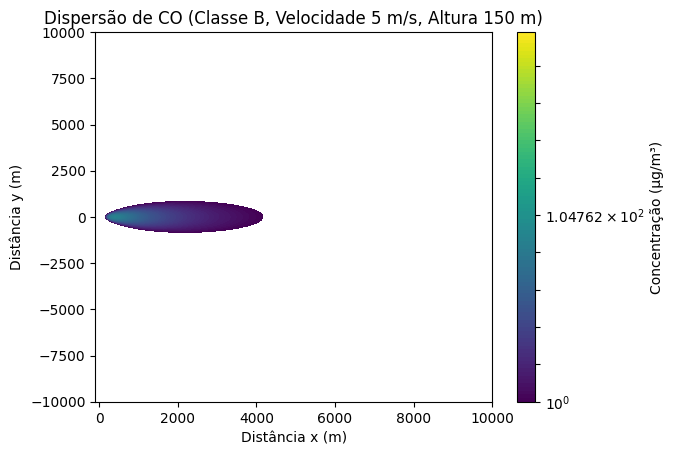

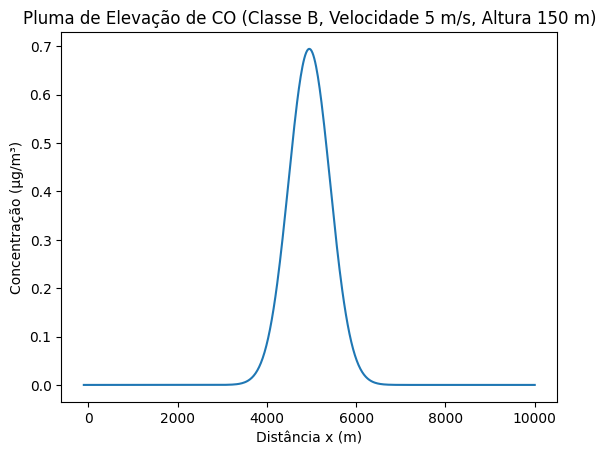

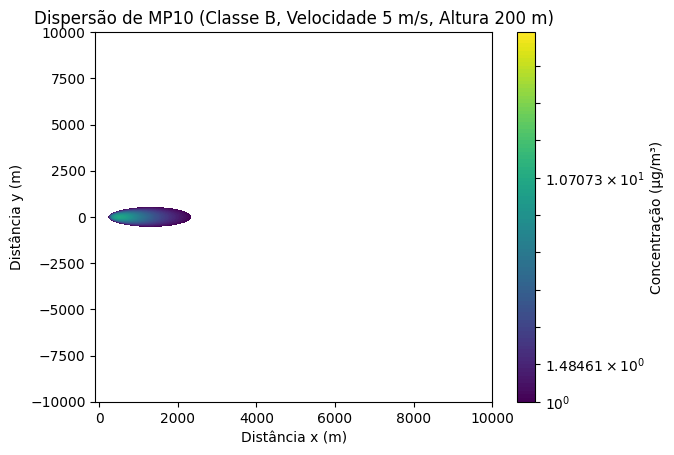

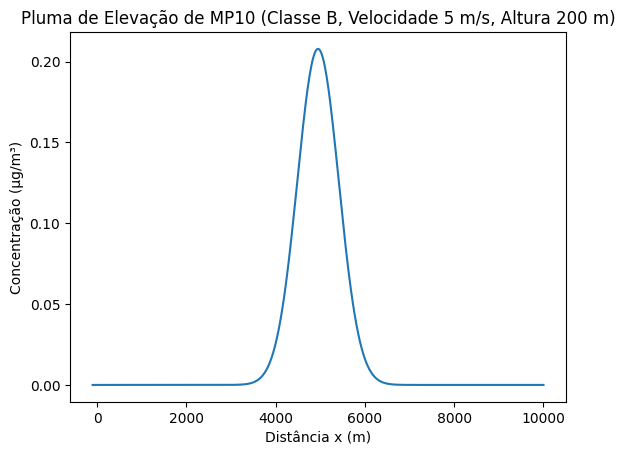

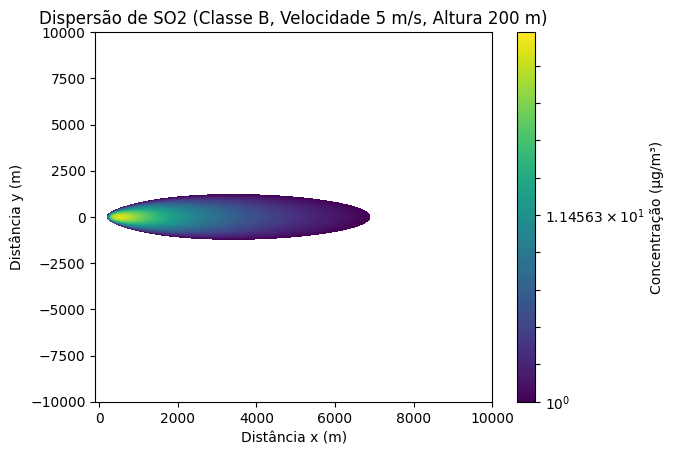

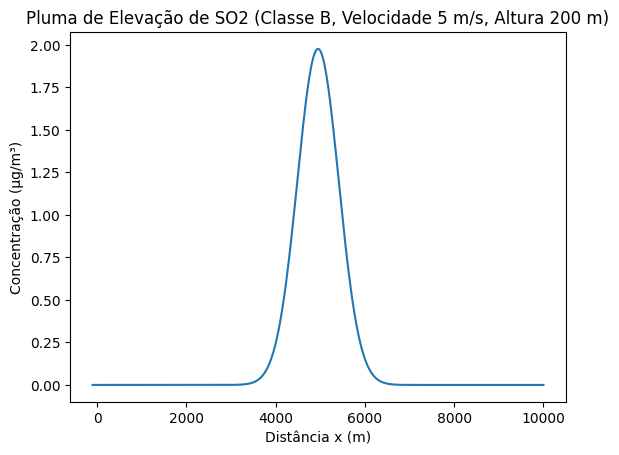

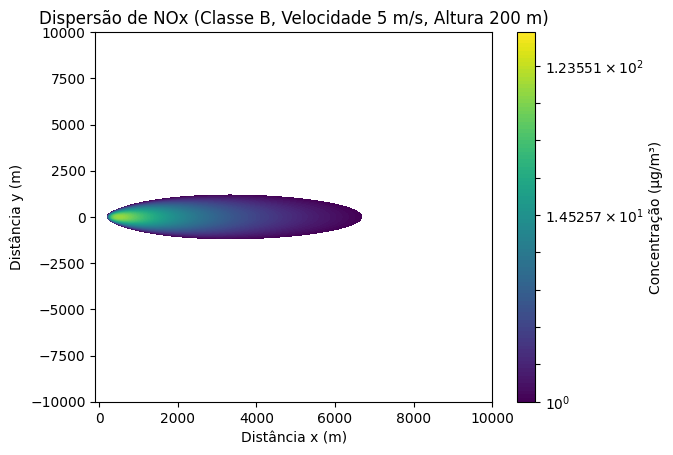

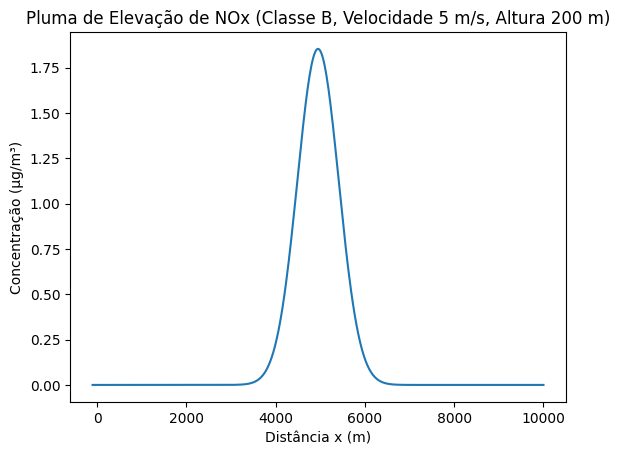

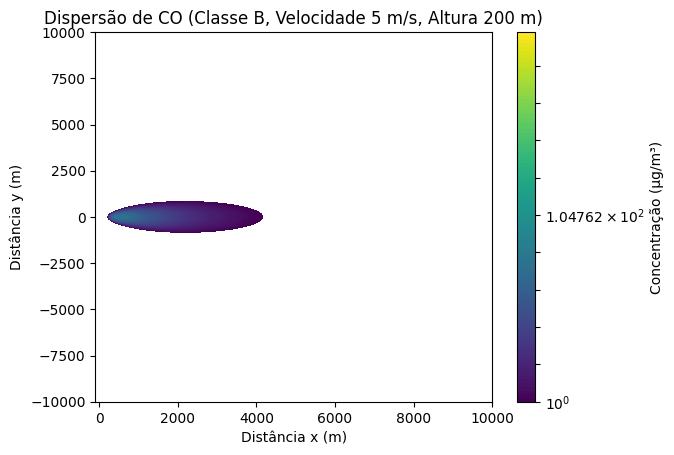

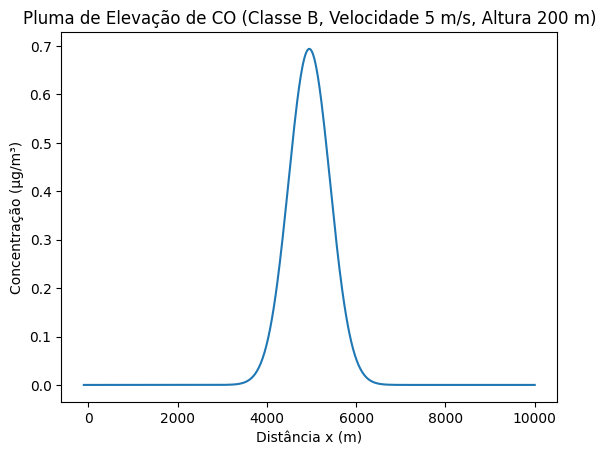

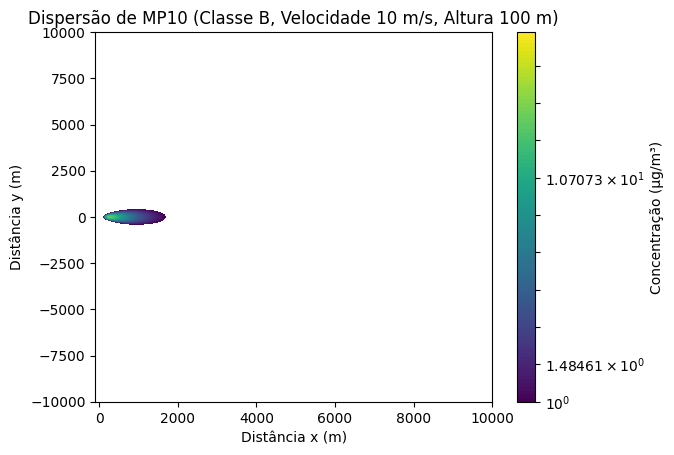

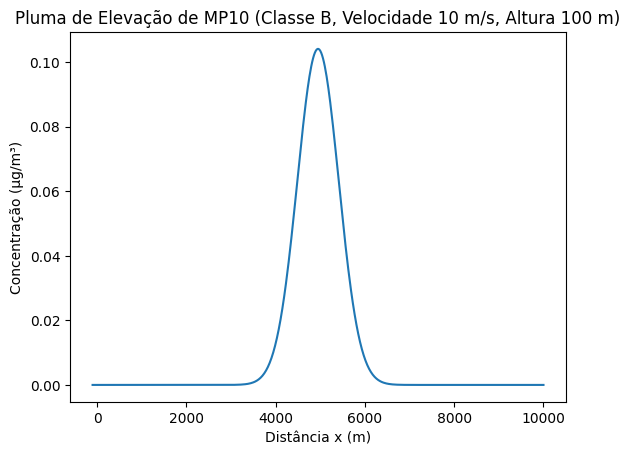

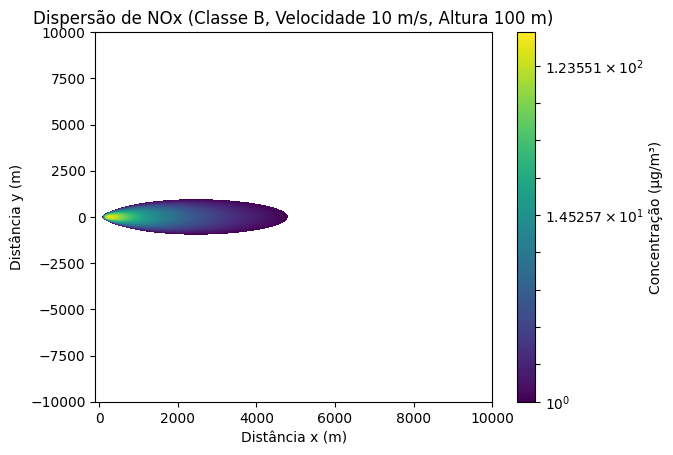

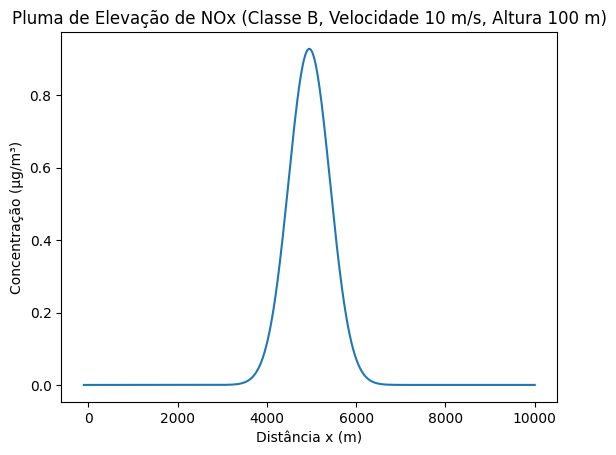

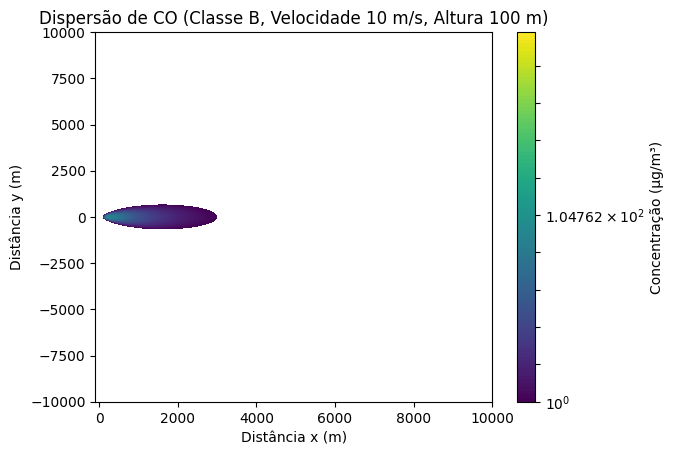

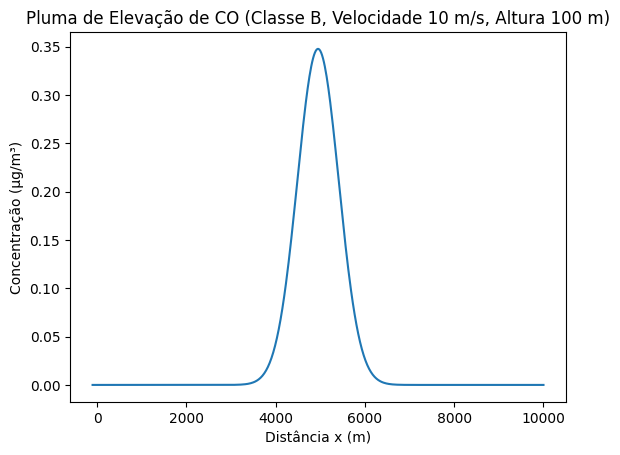

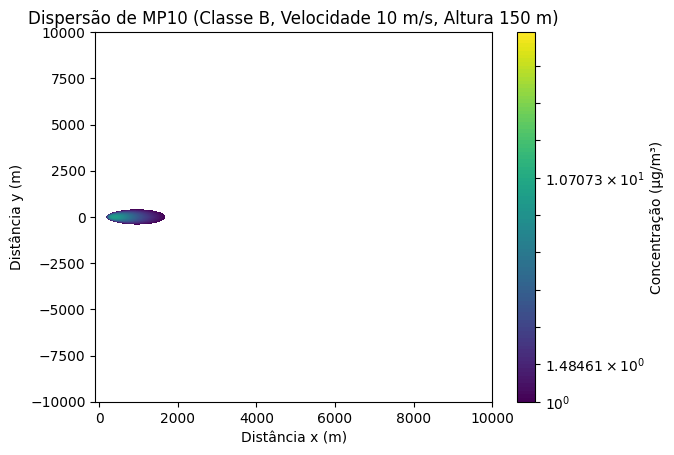

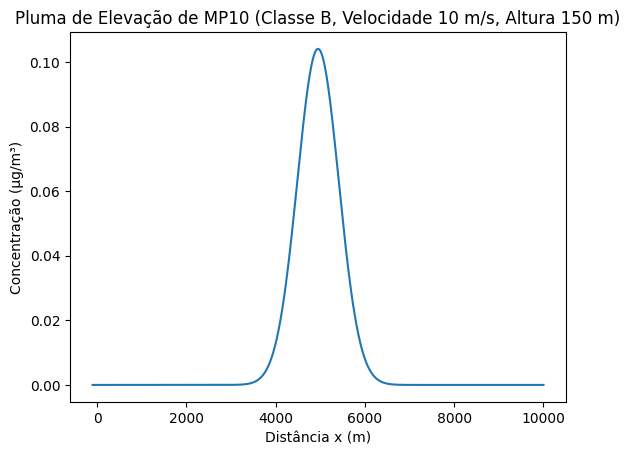

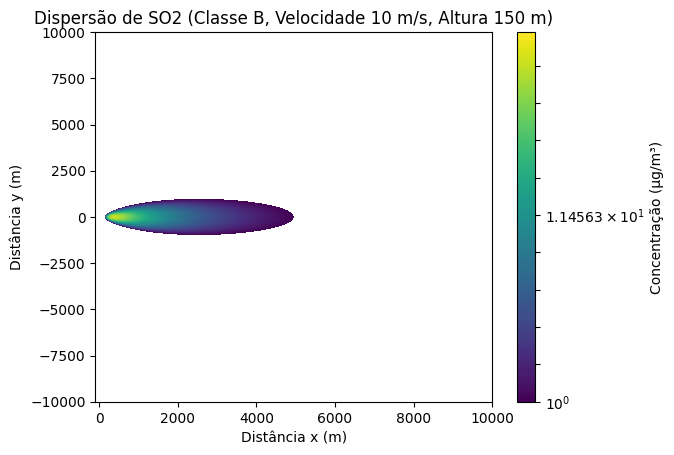

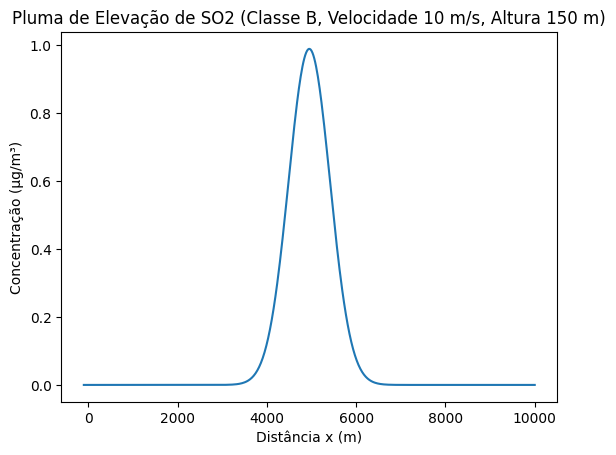

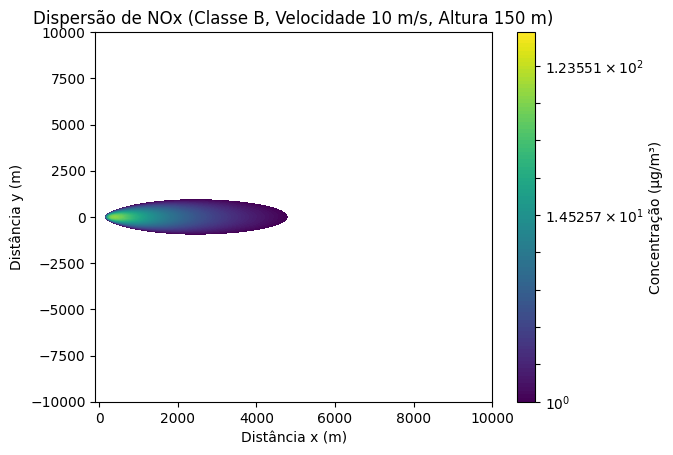

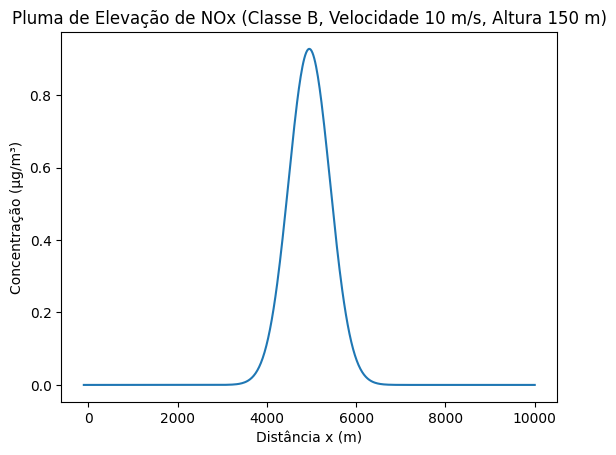

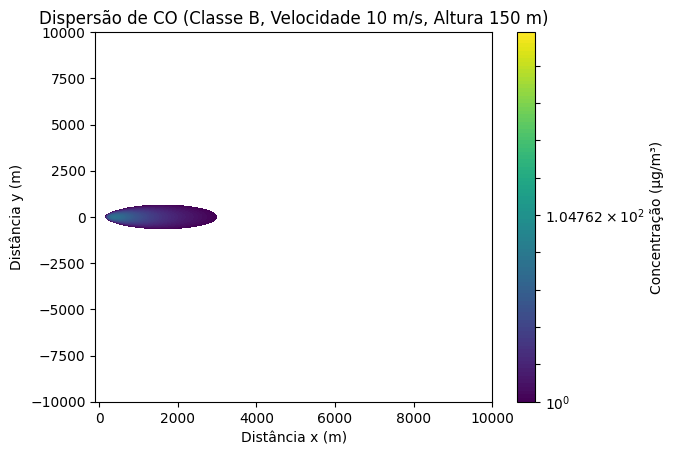

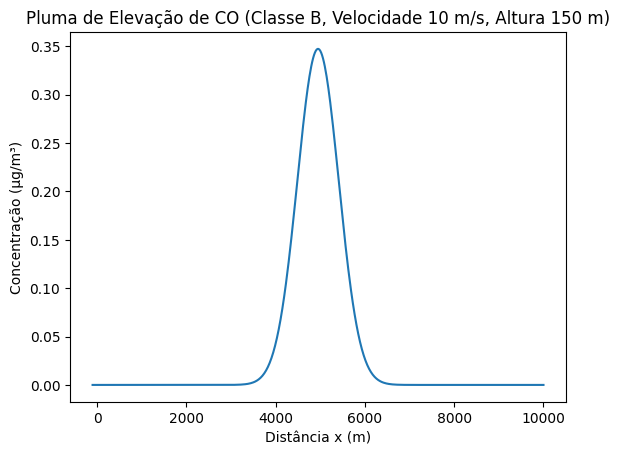

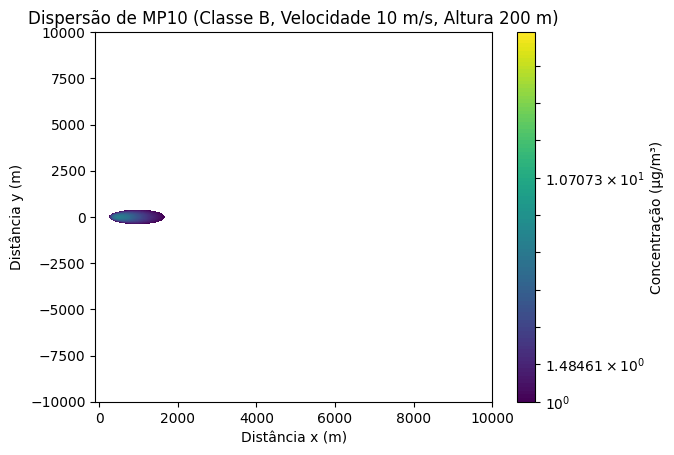

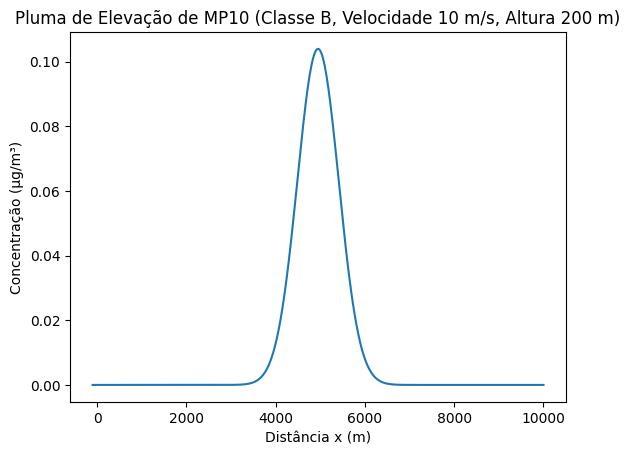

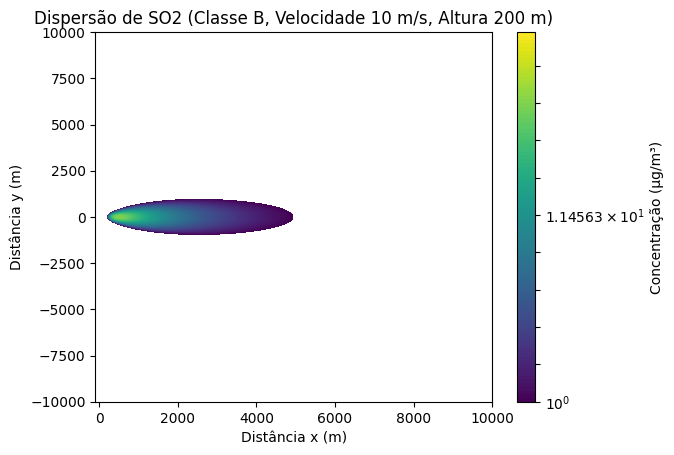

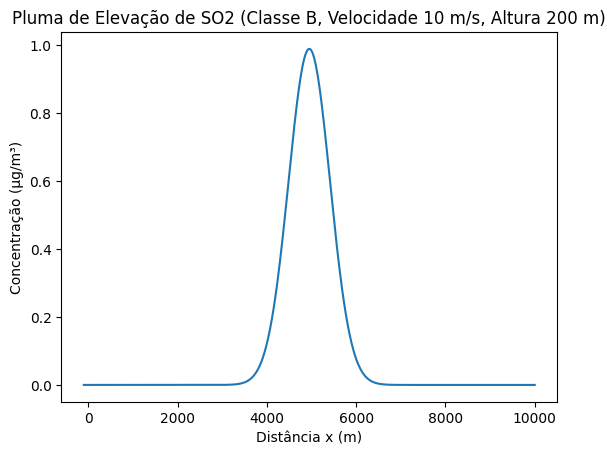

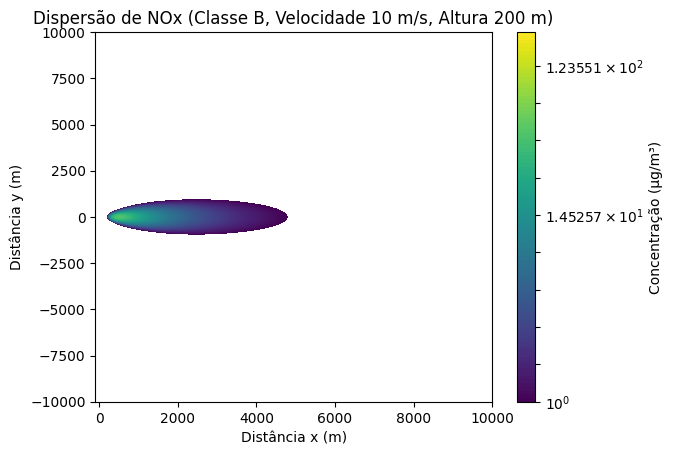

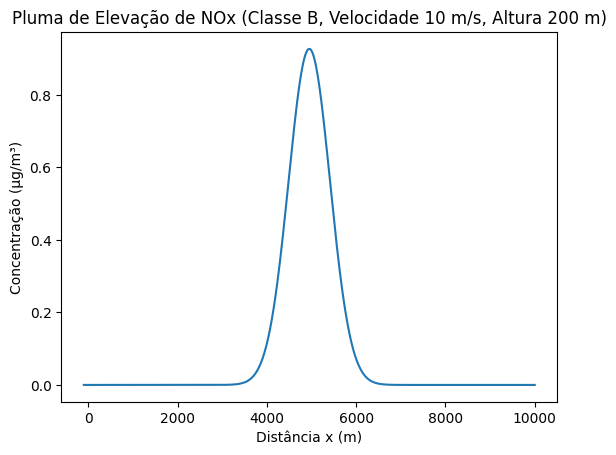

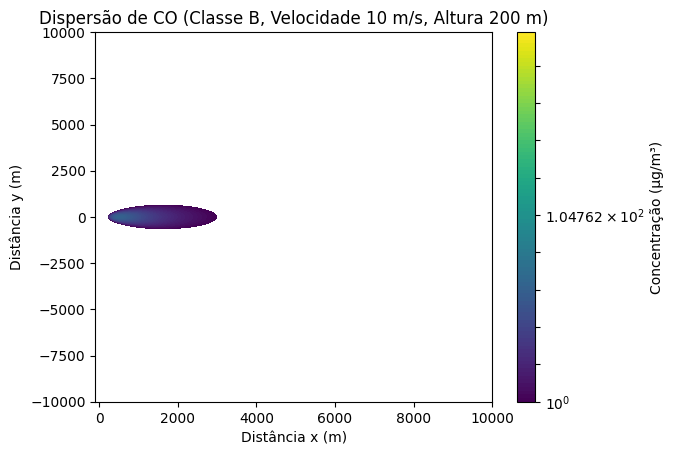

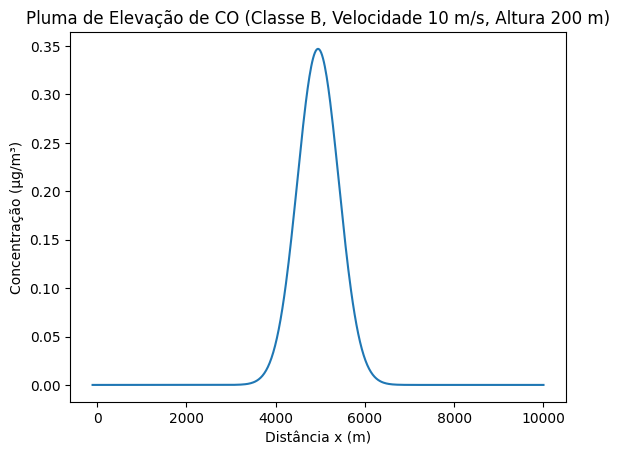

In [25]:
# Parâmetros de entrada
taxas_emissao = {
    "MP10": 8.74, # g/s #emissões máximas do nosso empreendimento
    "SO2": 83.13, # g/s
    "NOx": 77.93, # g/s
    "CO": 29.19  # g/s
}

# Padrões da Resolução CONAMA 491
padroes_conama = {
    "MP10": 50, # µg/m³
    "SO2": 125, # µg/m³
    "NOx": 200, # µg/m³
    "CO": 10000  # µg/m³ (convertendo de 10 mg/m³)
}

# Condições de entrada para as simulações
classes_estabilidade = ['A', 'B']
velocidades_vento = [2, 5, 10]  # m/s
alturas_chamine_iniciais = [100, 150, 200]  # m

# Criação do domínio de modelagem
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)
xx, yy = np.meshgrid(x, y)

# Função para rodar as simulações
def rodar_simulacoes(taxas_emissao, padroes_conama, classes_estabilidade, velocidades_vento, alturas_chamine_iniciais):
    resultados = []
    for classe in classes_estabilidade:
        for u in velocidades_vento:
            for hg in alturas_chamine_iniciais:
                sigmaY, sigmaZ = sigmaXY(xx, classe, 'urbano')
                d = 1  # m
                vs = 10  # m/s
                Ts = 300  # K
                Tamb = 293  # K
                if vs > 1.5 * u:
                    deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
                    hef = hg + deltaH
                else:
                    hef = hg + 2 * d * ((vs / u) - 1.5)
                
                for poluente, qs in taxas_emissao.items():
                    conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, 1.5, hef)
                    max_conc = np.max(conc)
                    padrao = padroes_conama[poluente]
                    if max_conc > padrao:
                        # Ajustar a altura da chaminé
                        hg_ajustada = ajustar_altura_chamine(qs, padrao, sigmaY, sigmaZ, u, yy, vs, d, Ts, Tamb, hg)
                        resultados.append({
                            "Classe": classe,
                            "Velocidade_Vento": u,
                            "Altura_Chamine_Inicial": hg,
                            "Altura_Chamine_Ajustada": hg_ajustada,
                            "Poluente": poluente,
                            "Max_Concentracao": max_conc,
                            "Padrao": padrao,
                            "Violacao": True
                        })
                    else:
                        resultados.append({
                            "Classe": classe,
                            "Velocidade_Vento": u,
                            "Altura_Chamine_Inicial": hg,
                            "Altura_Chamine_Ajustada": hg,
                            "Poluente": poluente,
                            "Max_Concentracao": max_conc,
                            "Padrao": padrao,
                            "Violacao": False
                        })
    
    return resultados

def ajustar_altura_chamine(qs, padrao, sigmaY, sigmaZ, u, yy, vs, d, Ts, Tamb, hg_inicial):
    altura = hg_inicial
    violacao = True
    while violacao:
        if vs > 1.5 * u:
            deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
            hef = altura + deltaH
        else:
            hef = altura + 2 * d * ((vs / u) - 1.5)
        
        conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, 1.5, hef)
        max_conc = np.max(conc)
        if max_conc <= padrao:
            violacao = False
        else:
            altura += 10  # Aumenta a altura da chaminé em 10 m a cada iteração
    return altura

# Função para plotar gráficos de dispersão e pluma de elevação
def plotar_graficos(resultados, taxas_emissao, x, y, yy):
    for resultado in resultados:
        if resultado['Violacao']:
            continue
        classe = resultado['Classe']
        u = resultado['Velocidade_Vento']
        hg = resultado['Altura_Chamine_Ajustada']
        poluente = resultado['Poluente']
        qs = taxas_emissao[poluente]
        sigmaY, sigmaZ = sigmaXY(x, classe, 'urbano')
        d = 1  # m
        vs = 10  # m/s
        Ts = 300  # K
        Tamb = 293  # K
        if vs > 1.5 * u:
            deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
            hef = hg + deltaH
        else:
            hef = hg + 2 * d * ((vs / u) - 1.5)

        conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, 1.5, hef)

        # Gráfico de dispersão
        fig, ax = plt.subplots()
        levels = np.logspace(np.log10(1), np.log10(padroes_conama[poluente]), num=100)
        cs = ax.contourf(x, y, conc, levels=levels, norm=LogNorm(), cmap='viridis')
        plt.colorbar(cs, ax=ax, label='Concentração (µg/m³)')
        plt.title(f'Dispersão de {poluente} (Classe {classe}, Velocidade {u} m/s, Altura {hg} m)')
        plt.xlabel('Distância x (m)')
        plt.ylabel('Distância y (m)')
        plt.show()

        # Gráfico da pluma de elevação
        fig, ax = plt.subplots()
        ax.plot(x, conc[:, int(yy.shape[1]/2)])
        plt.title(f'Pluma de Elevação de {poluente} (Classe {classe}, Velocidade {u} m/s, Altura {hg} m)')
        plt.xlabel('Distância x (m)')
        plt.ylabel('Concentração (µg/m³)')
        plt.show()

# Rodando as simulações
resultados = rodar_simulacoes(taxas_emissao, padroes_conama, classes_estabilidade, velocidades_vento, alturas_chamine_iniciais)

# Imprimindo os resultados
for resultado in resultados:
    print(f"Classe: {resultado['Classe']}, Velocidade do Vento: {resultado['Velocidade_Vento']} m/s, Altura da Chaminé Inicial: {resultado['Altura_Chamine_Inicial']} m")
    print(f"Poluente: {resultado['Poluente']}, Concentração Máxima: {resultado['Max_Concentracao']} µg/m³, Padrão: {resultado['Padrao']} µg/m³")
    print(f"Altura da Chaminé Ajustada: {resultado['Altura_Chamine_Ajustada']} m")
    print(f"Violação: {'Sim' if resultado['Violacao'] else 'Não'}\n")

# Visualização de alguns casos específicos
plotar_graficos(resultados, taxas_emissao, x, y, yy)